# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description


**Choice of model**

We have specified an *Overlapping Generations Model* (OLG) where we analyze how the capital stock, wage rate, interest rate, labour stock, consumption and savings change. In order to see how these variables move within the economy, adjustable figures by sliders are made based on the model parameters. Those are the capital share of output ($\alpha$), the depreciation rate ($\delta$), the discount factor ($\beta$), population growth ($n$) and the savings rate ($s$).

**Specifications of the model** 

Time is discrete and we look at a case with 100 periods, $t = \in \{1, 2, 3,...,100\}$.
Agents live for 2 periods. The first generation is young in period 1 and old in period 2. A new generation is born each period and the old generation also dies each period.

The population growths at a constant rate n, $L_t = L_{t-1}(1+n)$.

Agents will supply a total of 1 unit of labour when young in period t=1 and then split their wage for consumption and savings which they will live off when they get old. The maximization problem of the agents is:

$max_{c_{1t},c_{2t+1}} = u(c_{1t})+\beta u(c_{2t+1})$

s.t.

$c_{1t}+\frac{c_{2t+1}}{1+r_{t+1}}=w_t$

Which is the lifetime budget constrant where the savings rate are substituted out from the two budget constraints that apply for each of the periods the agents live. These two constraints are as follow:

$c_{1t}+s_t=w_t$

$c_{2t+1}=(1+r_{t+1})s_t$

Firms and production are tied to a Cobb-Douglas production function. Markets are competitive and firms are profit-maximizing.

$Y_t=AK_t^\alpha L_t^{1-\alpha}$

Wage and interest rate in this model are given as:

$w_t=f(k_t)-f´(k_t)k_t$

$r_t=f´(k_t)$

notice that $k\equiv\frac{K}{L}$ capital per worker as the old doesn´t work







## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

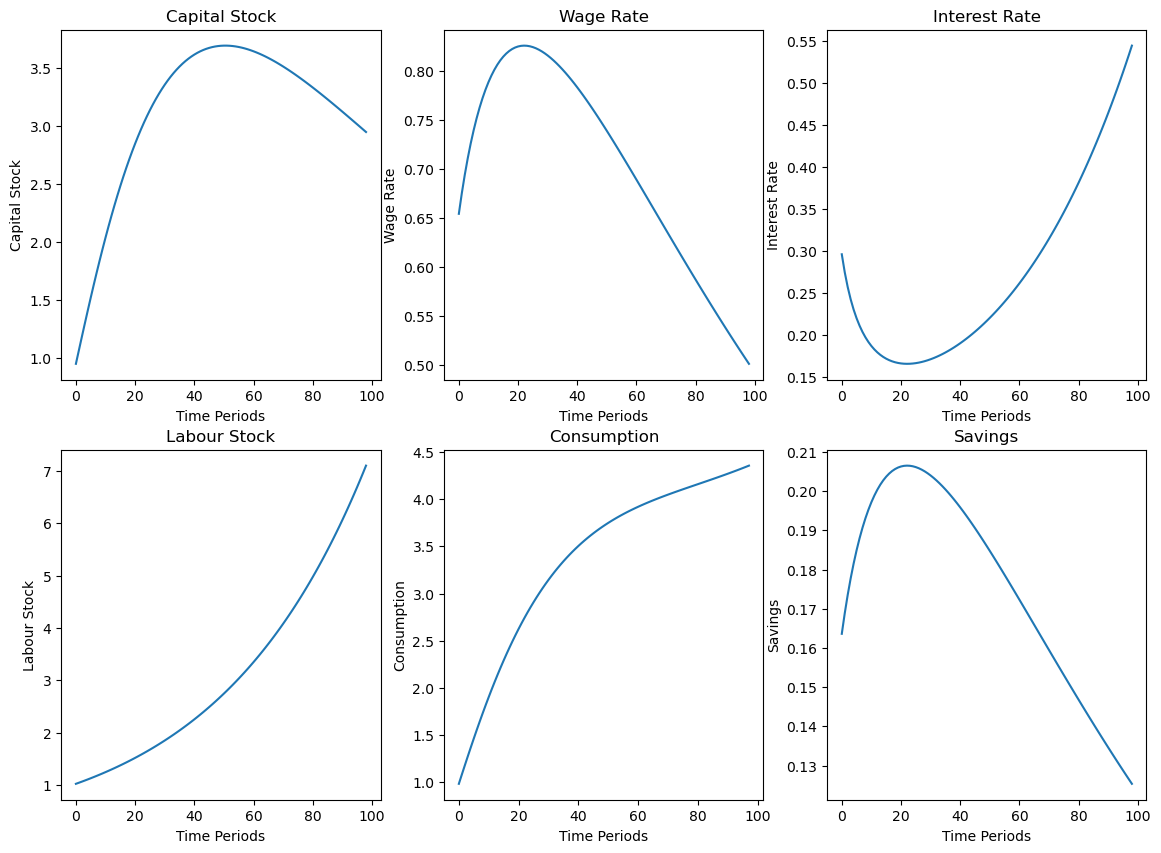

In [2]:
# Set model parameters
T = 100         # number of time periods
alpha = 0.33   # capital share of output
delta = 0.05    # depreciation rate
beta = 0.7    # discount factor
n = 0.02    # population growth
s = 0.25    # Savings rate

# Initialize arrays for variables
K = np.zeros(T)   # capital stock
L = np.zeros(T)   # Labour stock
C = np.zeros(T)     # consumption
S = np.zeros(T)   # Savings
r = np.zeros(T)     # interest rate
w = np.zeros(T)     # wage rate

# Intial guesses
K[0] = 1
L[0] = 1

# Loop over time periods
for t in range(1, T):
    # Update capital
    K[t] = (1-delta)*K[t-1] + S[t-1]

    # Update labour
    L[t] = L[t-1]*(1+n)

    # Calculate wage rate
    w[t] = (1 - alpha) * (K[t] / L[t]) ** alpha
    
    # Calculate interest rate
    r[t] = alpha * (L[t] / K[t]) ** (1 - alpha) - delta

    # Calculate savings
    S[t] = s*w[t]

    # Calculate consumption
    if t < T-1:
        C[t] = beta * (1 + r[t+1]) * (L[t] * w[t] + (1 - delta) * K[t] - S[t])


# Check for negative values of capital and labour
    if K[t] < 0:
        K[t] = 0
    if L[t] < 0:
        L[t] = 0


# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))

# Plot capital stock
axs[0, 0].plot(K[1:])
axs[0, 0].set_title('Capital Stock')
axs[0, 0].set_xlabel('Time Periods')
axs[0, 0].set_ylabel('Capital Stock')

# Plot wage rate
axs[0, 1].plot(w[1:])
axs[0, 1].set_title('Wage Rate')
axs[0, 1].set_xlabel('Time Periods')
axs[0, 1].set_ylabel('Wage Rate')

# Plot interest rate
axs[0, 2].plot(r[1:])
axs[0, 2].set_title('Interest Rate')
axs[0, 2].set_xlabel('Time Periods')
axs[0, 2].set_ylabel('Interest Rate')

# Plot labour stock
axs[1, 0].plot(L[1:])
axs[1, 0].set_title('Labour Stock')
axs[1, 0].set_xlabel('Time Periods')
axs[1, 0].set_ylabel('Labour Stock')

# Plot consumption
axs[1, 1].plot(C[1:99])
axs[1, 1].set_title('Consumption')
axs[1, 1].set_xlabel('Time Periods')
axs[1, 1].set_ylabel('Consumption')

# Plot consumption
axs[1, 2].plot(S[1:])
axs[1, 2].set_title('Savings')
axs[1, 2].set_xlabel('Time Periods')
axs[1, 2].set_ylabel('Savings')

# Show the plot
plt.show()

**Troll**

In [3]:
# Define the interactive sliders
T_slider = widgets.IntSlider(min=1, max=200, step=1, value=100, description='T')
alpha_slider = widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.33, description='alpha')
delta_slider = widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.05, description='delta')
beta_slider = widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.7, description='beta')
n_slider = widgets.FloatSlider(min=0.0, max=0.1, step=0.01, value=0.02, description='n')
s_slider = widgets.FloatSlider(min=0.0, max=0.5, step=0.01, value=0.25, description='s')

# Define the function that will be called when the sliders change
def update_plot(T, alpha, delta, beta, n, s):
    # Initialize arrays for variables
    K = np.zeros(T)   # capital stock
    L = np.zeros(T)   # Labour stock
    C = np.zeros(T)     # consumption
    S = np.zeros(T)   # Savings
    r = np.zeros(T)     # interest rate
    w = np.zeros(T)     # wage rate

    # Intial guesses
    K[0] = 1
    L[0] = 1

    # Loop over time periods
    for t in range(1, T):
        # Update capital
        K[t] = (1-delta)*K[t-1] + S[t-1]

        # Update labour
        L[t] = L[t-1]*(1+n)

        # Calculate wage rate
        w[t] = (1 - alpha) * (K[t] / L[t]) ** alpha

        # Calculate interest rate
        r[t] = alpha * (L[t] / K[t]) ** (1 - alpha) - delta

        # Calculate savings
        S[t] = s*w[t]

        # Calculate consumption
        if t < T-1:
            C[t] = beta * (1 + r[t+1]) * (L[t] * w[t] + (1 - delta) * K[t] - S[t])

        # Check for negative values of capital and labour
        if K[t] < 0:
            K[t] = 0
        if L[t] < 0:
            L[t] = 0

    # Create a figure with subplots
    fig, axs = plt.subplots(2, 3, figsize=(14, 10))

    # Plot capital stock
    axs[0, 0].plot(K[1:])
    axs[0, 0].set_title('Capital Stock')
    axs[0, 0].set_xlabel('Time Periods')
    axs[0, 0].set_ylabel('Capital Stock')

    # Plot wage rate
    axs[0, 1].plot(w[1:])
    axs[0, 1].set_title('Wage Rate')
    axs[0, 1].set_xlabel('Time Periods')
    axs[0, 1].set_ylabel('Wage Rate')

    # Plot interest rate
    axs[0, 2].plot(r[1:])
    axs[0, 2].set_title('Interest Rate')
    axs[0, 2].set_xlabel('Time Periods')
    axs[0, 2].set_ylabel('Interest Rate')

    # Plot labour stock
    axs[1, 0].plot(L[1:])
    axs[1, 0].set_title('Labour Stock')
    axs[1, 0].set_xlabel('Time Periods')
    axs[1, 0].set_ylabel('Labour Stock')

    # Plot consumption
    axs[1, 1].plot(C[1:99])
    axs[1, 1].set_title('Consumption')
    axs[1, 1].set_xlabel('Time Periods')
    axs[1, 1].set_ylabel('Consumption')

    # Plot consumption
    axs[1, 2].plot(S[1:])
    axs[1, 2].set_title('Savings')
    axs[1, 2].set_xlabel('Time Periods')
    axs[1, 2].set_ylabel('Savings')

widgets.interact(update_plot,
                 T=widgets.fixed(T),
                 alpha=widgets.FloatSlider(
                     description="$\alpha$", min=0.0, max=0.99, step=0.01, value=0.33),
                 delta=widgets.FloatSlider(
                     description="$\delta$", min=0.0, max=0.99, step=0.01, value=0.05),
                 beta=widgets.FloatSlider(
                     description="$\beta$", min=0.0, max=0.99, step=0.01, value=0.7),
                 n=widgets.FloatSlider(
                     description="$n$", min=0.0, max=0.1, step=0.01, value=0.02),
                 s=widgets.FloatSlider(
                     description="$s$", min=0.0, max=0.99, step=0.01, value=0.25)         
)

interactive(children=(FloatSlider(value=0.33, description='$\x07lpha$', max=0.99, step=0.01), FloatSlider(valu…

<function __main__.update_plot(T, alpha, delta, beta, n, s)>

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 